In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import example_graphs as ex
import cluster_refinement as refinement
import visual_aids as vis

Graph alb2000.hcp.gz: 2000 nodes, 3996 edges
Graph alb4000.hcp.gz: 4000 nodes, 7997 edges
Graph alb3000b.hcp.gz: 3000 nodes, 5997 edges
Graph alb3000d.hcp.gz: 3000 nodes, 5993 edges
Graph alb5000.hcp.gz: 5000 nodes, 9999 edges
Graph alb3000a.hcp.gz: 3000 nodes, 5999 edges
Graph alb3000c.hcp.gz: 3000 nodes, 5996 edges
Graph alb1000.hcp.gz: 1000 nodes, 1998 edges
Graph alb3000e.hcp.gz: 3000 nodes, 5996 edges


In [2]:
def draw(G, title):
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black')
    plt.title(f"{title}")
    plt.show()

In [3]:
def aggressive_pruning(G, threshold=2):
    H = G.copy()
    n = G.number_of_nodes()
    candidates = deque(list(H.edges()))
    while candidates:
        u, v = candidates.popleft()
        if not H.has_edge(u, v): #remove if edge doesn't exist anymore
            continue
        if H.degree(u) + H.degree(v) < n + threshold:
            continue
        else:
            H.remove_edge(u, v)
            #print(f"removing edge {u}-{v}")
            #draw(H)
            for w in list(H.neighbors(u)):
                candidates.append((u, w))
            for w in list(H.neighbors(v)):
                candidates.append((v, w))
    
    #plt.show()
    return H

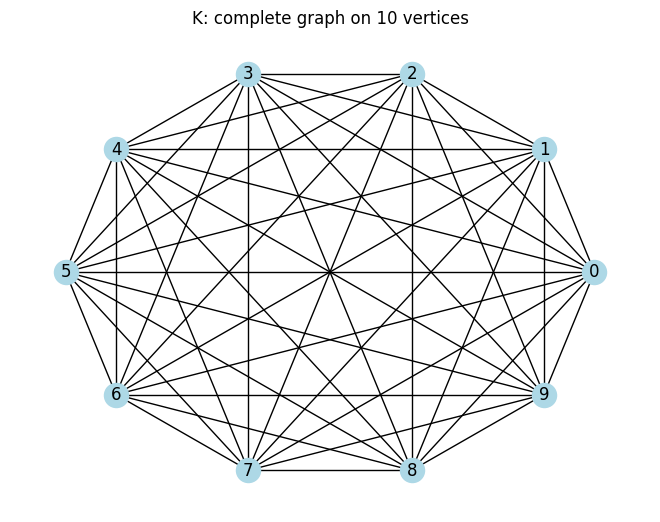

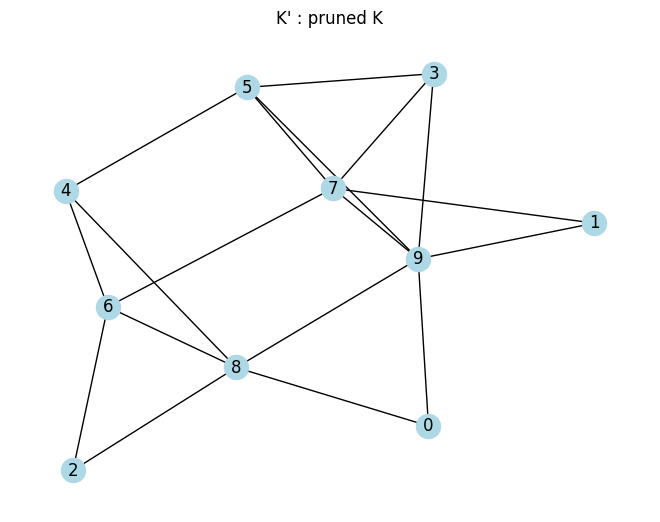

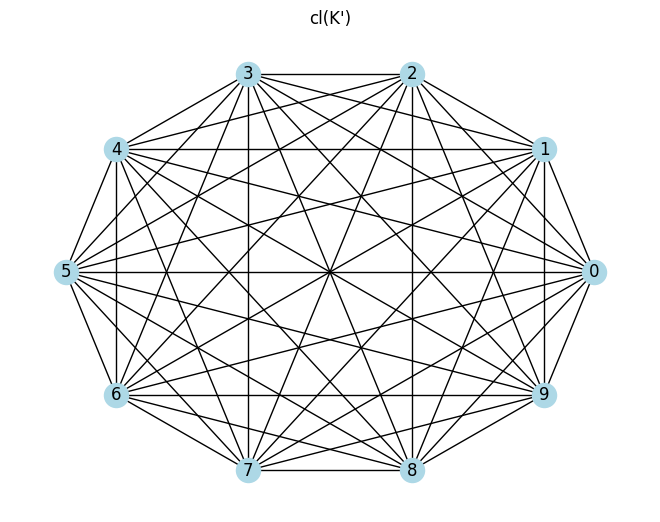

In [4]:
n=10
G = nx.complete_graph(n)
draw(G, f"K: complete graph on {n} vertices")
pruned = aggressive_pruning(G)
draw(pruned, f"K' : pruned K")
cl = refinement.bondy_chvatal_closure(pruned)
draw(cl, "cl(K')")

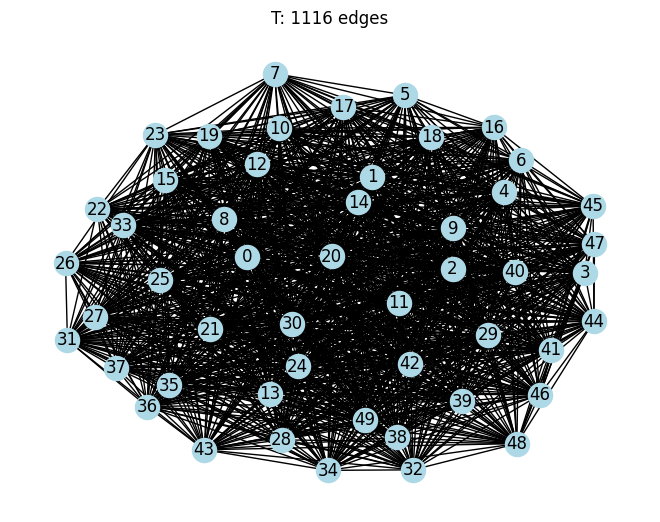

In [44]:
T = ex.test_graph_sparsity(50, 0.1) ## pruning efficient under 0.7 in general
draw(T, f"T: {T.number_of_edges()} edges")


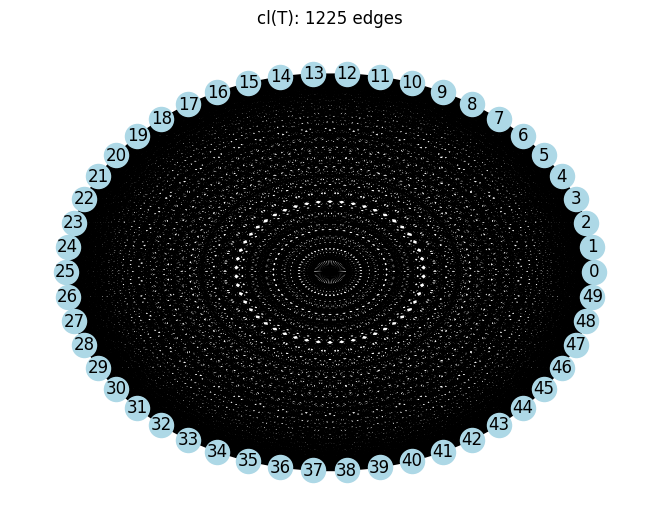

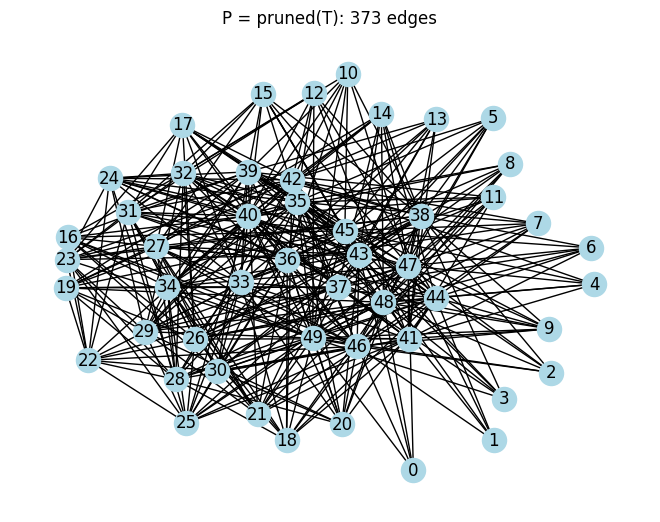

In [45]:
cl = refinement.bondy_chvatal_closure(T)
draw(cl, f"cl(T): {cl.number_of_edges()} edges")
P = aggressive_pruning(T)
draw(P, f"P = pruned(T): {P.number_of_edges()} edges")

no changes: [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (44, 0), (45, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (49, 1), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28

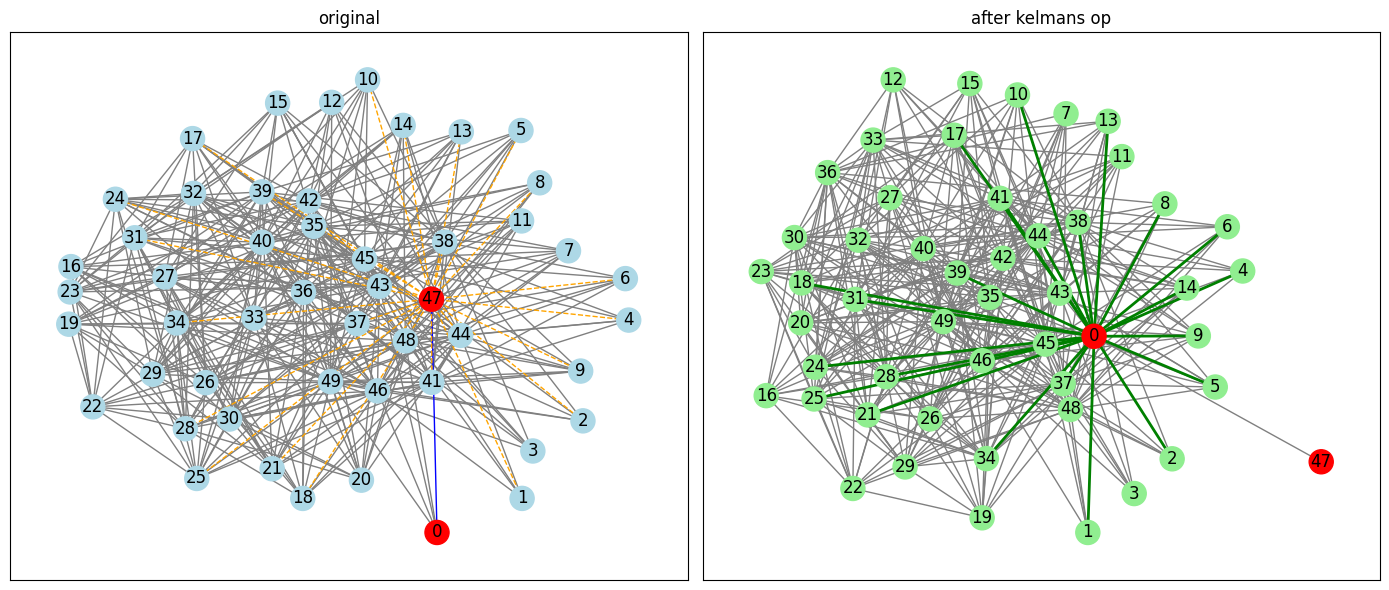

shift 37 -> 3, modification type: has_pendent_edge


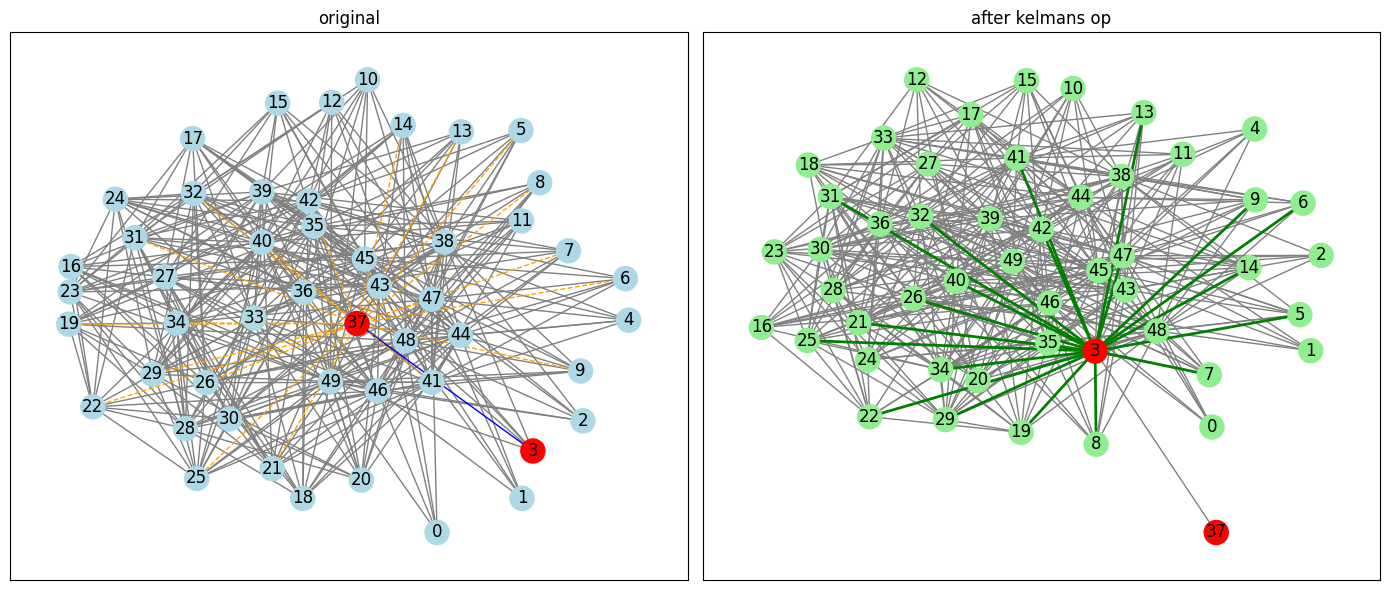

shift 45 -> 5, modification type: has_pendent_edge


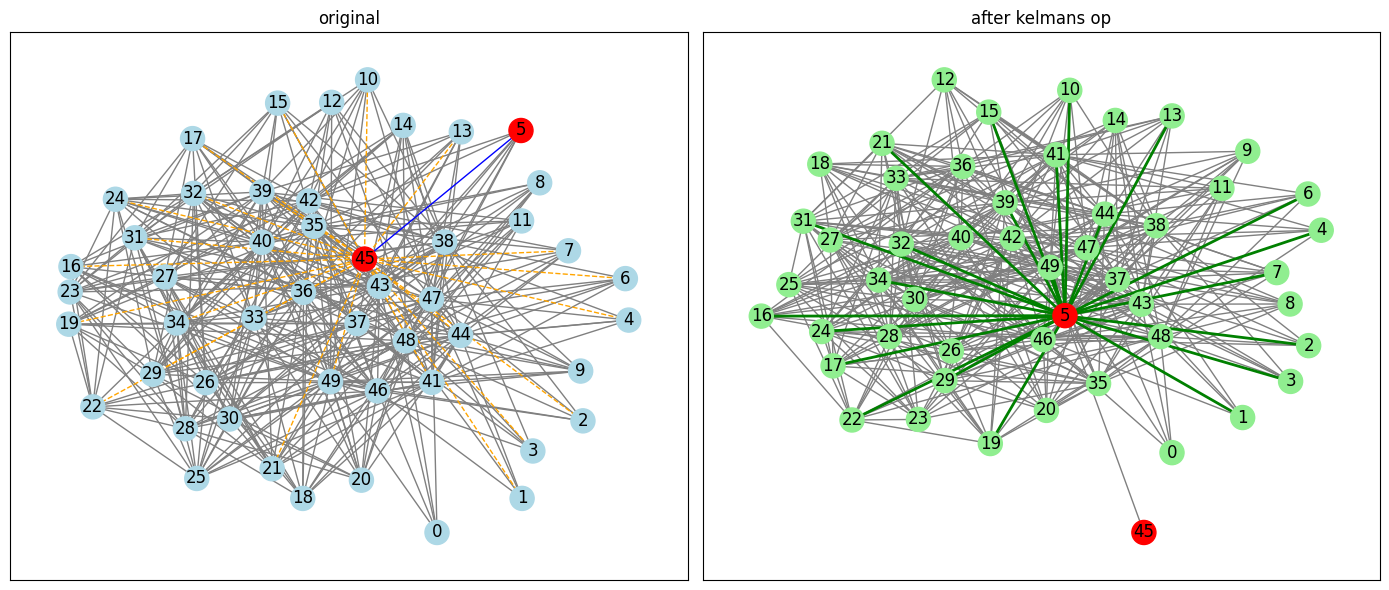

is_disconnected: []
other: [(43, 0), (46, 0), (48, 0), (49, 0), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (38, 2), (45, 2), (46, 2), (47, 2), (48, 2), (49, 2), (38, 3), (43, 3), (45, 3), (48, 3), (49, 3), (41, 4), (42, 4), (44, 4), (45, 4), (47, 4), (48, 4), (35, 5), (37, 5), (38, 5), (42, 5), (43, 5), (47, 5), (48, 5), (37, 6), (38, 6), (41, 6), (44, 6), (45, 6), (47, 6), (48, 6), (35, 7), (36, 7), (37, 7), (42, 7), (44, 7), (45, 7), (46, 7), (49, 7), (35, 8), (36, 8), (37, 8), (40, 8), (43, 8), (46, 8), (47, 8), (48, 8), (37, 9), (38, 9), (39, 9), (41, 9), (44, 9), (46, 9), (47, 9), (48, 9), (49, 9), (32, 10), (36, 10), (38, 10), (39, 10), (40, 10), (42, 10), (45, 10), (47, 10), (49, 10), (33, 11), (35, 11), (39, 11), (40, 11), (41, 11), (43, 11), (46, 11), (48, 11), (49, 11), (31, 12), (32, 12), (36, 12), (38, 12), (40, 12), (41, 12), (42, 12), (44, 12), (49, 12), (33, 13), (36, 13), (37, 13), (39, 13), (41, 13), (42, 13), (43, 13), (45, 13), (47, 13), (27, 14), (34, 14), (37, 14

In [46]:
vis.test_modifications(P)

In [47]:
vis.test_modifications(T)

no changes: [(0, 8), (0, 20), (0, 45), (1, 14), (1, 35), (9, 2), (2, 11), (2, 27), (40, 2), (25, 3), (3, 26), (3, 31), (40, 3), (3, 47), (4, 6), (4, 26), (30, 4), (18, 5), (21, 5), (32, 5), (36, 5), (46, 5), (49, 5), (18, 6), (6, 31), (6, 35), (43, 6), (9, 7), (11, 7), (13, 7), (24, 7), (28, 7), (34, 7), (39, 7), (48, 7), (8, 12), (8, 38), (8, 45), (9, 22), (9, 32), (11, 10), (12, 10), (25, 10), (34, 10), (10, 48), (20, 11), (11, 37), (19, 12), (12, 35), (46, 12), (13, 24), (20, 14), (14, 26), (28, 14), (15, 48), (15, 49), (16, 27), (16, 31), (41, 16), (43, 16), (17, 32), (17, 37), (17, 48), (18, 31), (18, 38), (23, 19), (19, 32), (43, 19), (19, 47), (20, 26), (26, 22), (27, 22), (32, 22), (33, 22), (38, 22), (41, 22), (34, 23), (39, 23), (44, 23), (46, 23), (30, 24), (42, 25), (29, 26), (45, 26), (31, 27), (35, 27), (40, 27), (47, 27), (28, 37), (28, 38), (44, 31), (32, 38), (33, 47), (33, 48), (36, 35), (37, 35), (38, 35), (41, 36), (36, 45), (46, 36), (44, 37), (45, 37), (48, 37), (